In [76]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import pickle
import random
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


Чтение данных 

In [77]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\1\\train.csv')
X = df.drop('Credit Default', axis=1)
y = df[['Credit Default']]

X_final = pd.read_csv('C:\\Users\\user\\Desktop\\1\\test.csv')
df.head(10)
X_prim = pd.read_csv('C:\\Users\\user\\Desktop\\1\\sample_submission.csv')


In [78]:
# сразу создам
preds_final = pd.DataFrame()
X_final['Id']=X_final.index
preds_final['Id'] = X_final['Id'].copy()


Анализ данных

In [79]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [80]:
df.shape

(7500, 17)

In [81]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [82]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [83]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [84]:
df['Number of Open Accounts'].value_counts()

9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
35.0      1
41.0      1
38.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64

In [85]:
df['Years of Credit History'].value_counts()

15.0    104
16.0     99
16.5     91
17.0     86
17.5     83
       ... 
43.2      1
4.9       1
39.5      1
42.4      1
39.8      1
Name: Years of Credit History, Length: 408, dtype: int64

In [86]:
df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [87]:
df['Months since last delinquent'].value_counts()

14.0     76
29.0     71
8.0      68
33.0     68
13.0     65
         ..
86.0      1
92.0      1
118.0     1
84.0      1
91.0      1
Name: Months since last delinquent, Length: 89, dtype: int64

In [88]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [89]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [90]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [91]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [92]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Очистка данных, заполнение пропусков, обработка выбросов

In [93]:
def transform(X):
    X['Credit Score']=X['Credit Score'].fillna((X['Credit Score'].mean()))
    X['Months since last delinquent']=X['Months since last delinquent'].fillna(1)
    X['Years in current job']=X['Years in current job'].fillna('< 1 year')
    X['Annual Income']=X['Annual Income'].fillna((X['Annual Income'].mean()))
    X['Bankruptcies']=X['Bankruptcies'].fillna(0)
    
            
    X['year_cat'] = np.nan
    X.loc[X['Years in current job'] == '< 1 year', 'year_cat'] = '0'
    X.loc[X['Years in current job'] =='1 year', 'year_cat'] = '1'
    X.loc[X['Years in current job'] =='2 years', 'year_cat'] = '2' 
    X.loc[X['Years in current job'] =='3 years', 'year_cat'] = '3'
    X.loc[X['Years in current job'] =='4 years', 'year_cat'] = '4'
    X.loc[X['Years in current job'] =='5 years', 'year_cat'] = '5'
    X.loc[X['Years in current job'] =='6 years', 'year_cat'] = '6'
    X.loc[X['Years in current job'] =='7 years', 'year_cat'] = '7'
    X.loc[X['Years in current job'] =='8 years', 'year_cat'] = '8'
    X.loc[X['Years in current job'] =='9 years', 'year_cat'] = '9'
    X.loc[X['Years in current job'] =='10+ years', 'year_cat'] = '10'
        
    X['year_cat']=X['year_cat'].astype(int)
    
    X['problem_credit'] = np.nan
    X.loc[(X['Tax Liens'] == 0) & (X['Number of Credit Problems'] == 0)& (X['Bankruptcies']== 0), 'problem_credit'] = 0
    X.loc[(X['Tax Liens'] >= 1) | (X['Number of Credit Problems'] >= 1) | (X['Bankruptcies'] >= 1) , 'problem_credit'] = 1
    
    X['year_cat']=X['year_cat'].astype(int)
    
   
    SELECTED_FEATURE_NAMES = ['Annual Income', 'year_cat','problem_credit',
                          'Number of Open Accounts', 'Years of Credit History',
                          'Maximum Open Credit', 'Months since last delinquent', 
                          'Current Loan Amount','Current Credit Balance',
                          'Monthly Debt', 'Credit Score'  ]
    return X[SELECTED_FEATURE_NAMES]

In [94]:
X=transform(X)
X_final=transform(X_final)


In [95]:
    SELECTED_FEATURE_NAMES = ['Annual Income', 'year_cat','problem_credit',
                          'Number of Open Accounts', 'Years of Credit History',
                          'Maximum Open Credit', 'Months since last delinquent', 
                          'Current Loan Amount','Current Credit Balance',
                          'Monthly Debt', 'Credit Score' ]

Анализ корреляционной связи данных (исходных) с таргетом

In [96]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

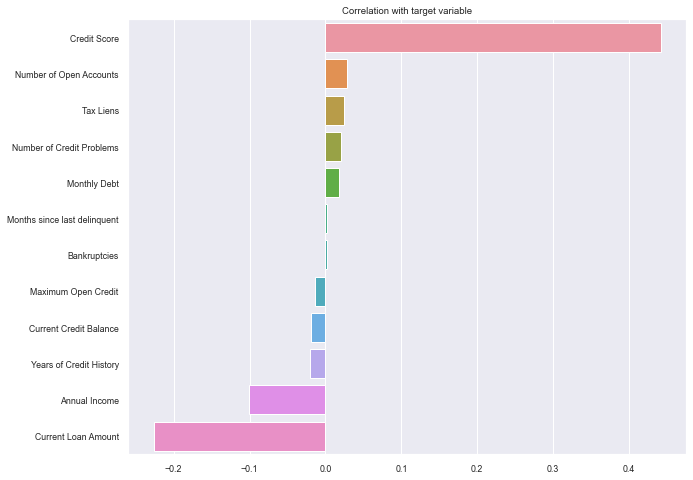

In [97]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

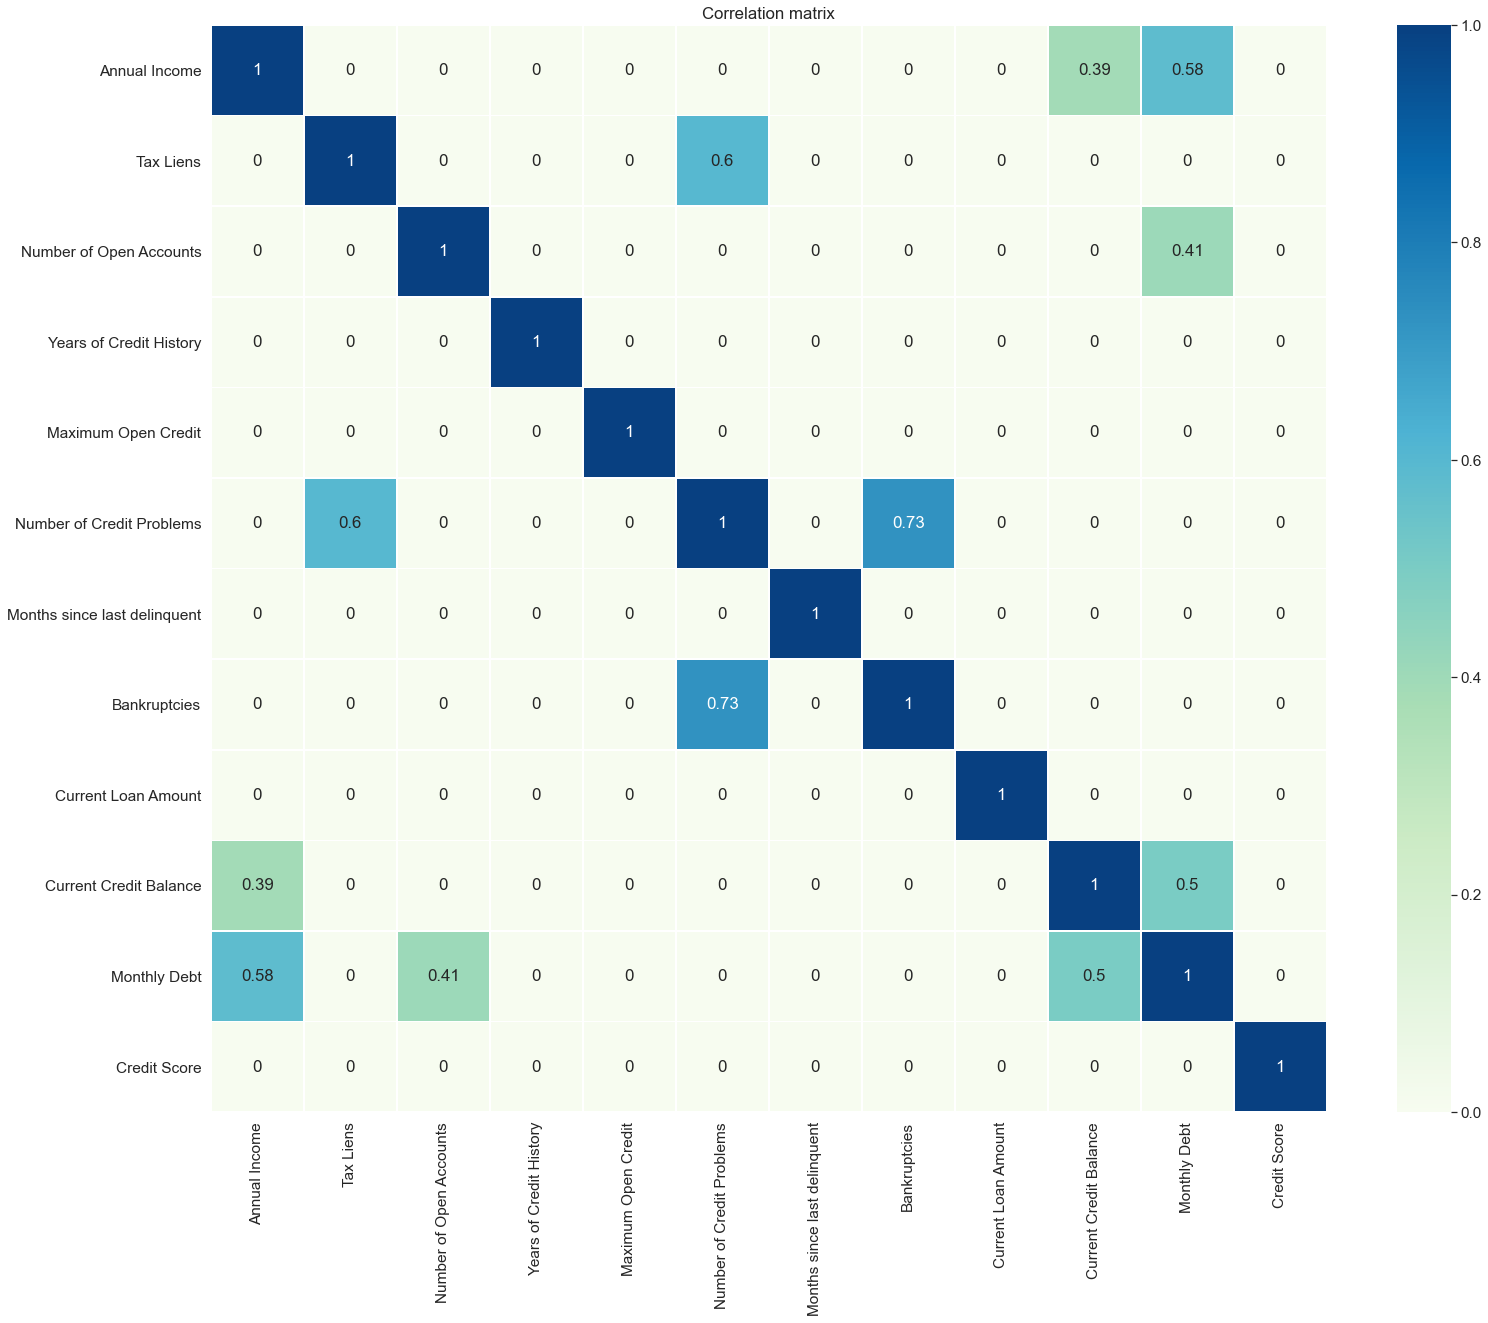

In [98]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df[BASE_FEATURE_NAMES].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

По матрице корреляции видна зависимость между "Банкротством", " Количеством проблем с кредитом" и " Налоговыми обременениями". Кроме матрицы корреляции очевидна логическая связь, поэтому эти три признака объединила в один : "Проблемы с кредитом" (были-1, не было-0)

Распределение признаков на трейне и тесте.

Annual Income


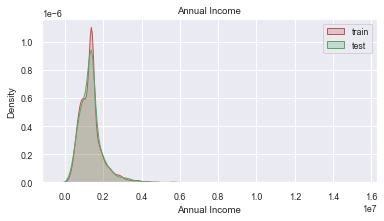

year_cat


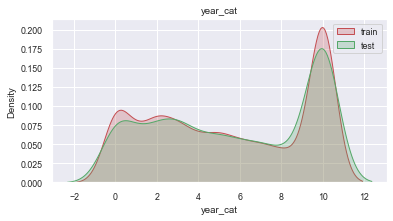

problem_credit


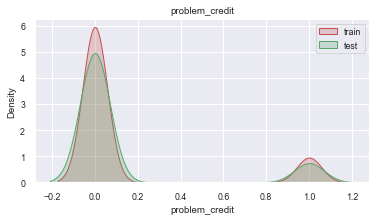

Number of Open Accounts


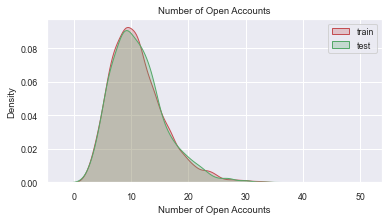

Years of Credit History


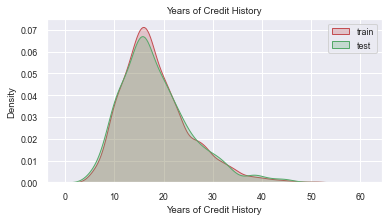

Maximum Open Credit


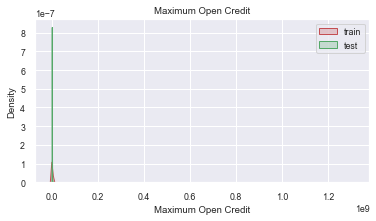

Months since last delinquent


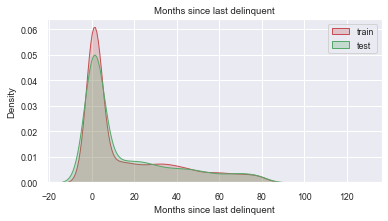

Current Loan Amount


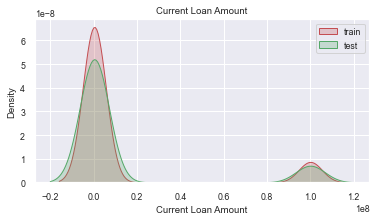

Current Credit Balance


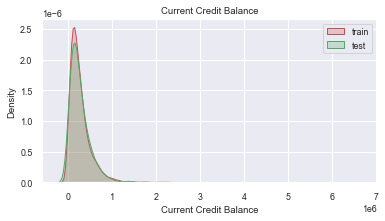

Monthly Debt


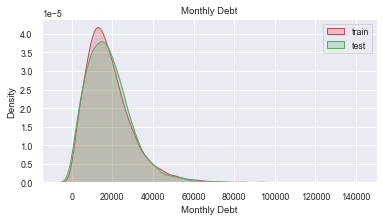

Credit Score


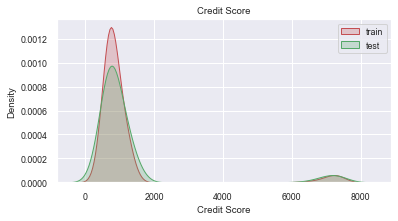

In [99]:
figsize = (6, 3)
for col in SELECTED_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(X[col], shade=True, label='train', color='r')
    sns.kdeplot(X_final[col], shade=True, label='test', color='g')
    print(col)
   
    plt.legend()
    plt.title(col)
    plt.show()

Рассмотрене признака'Home Ownership' в срезе таргета.

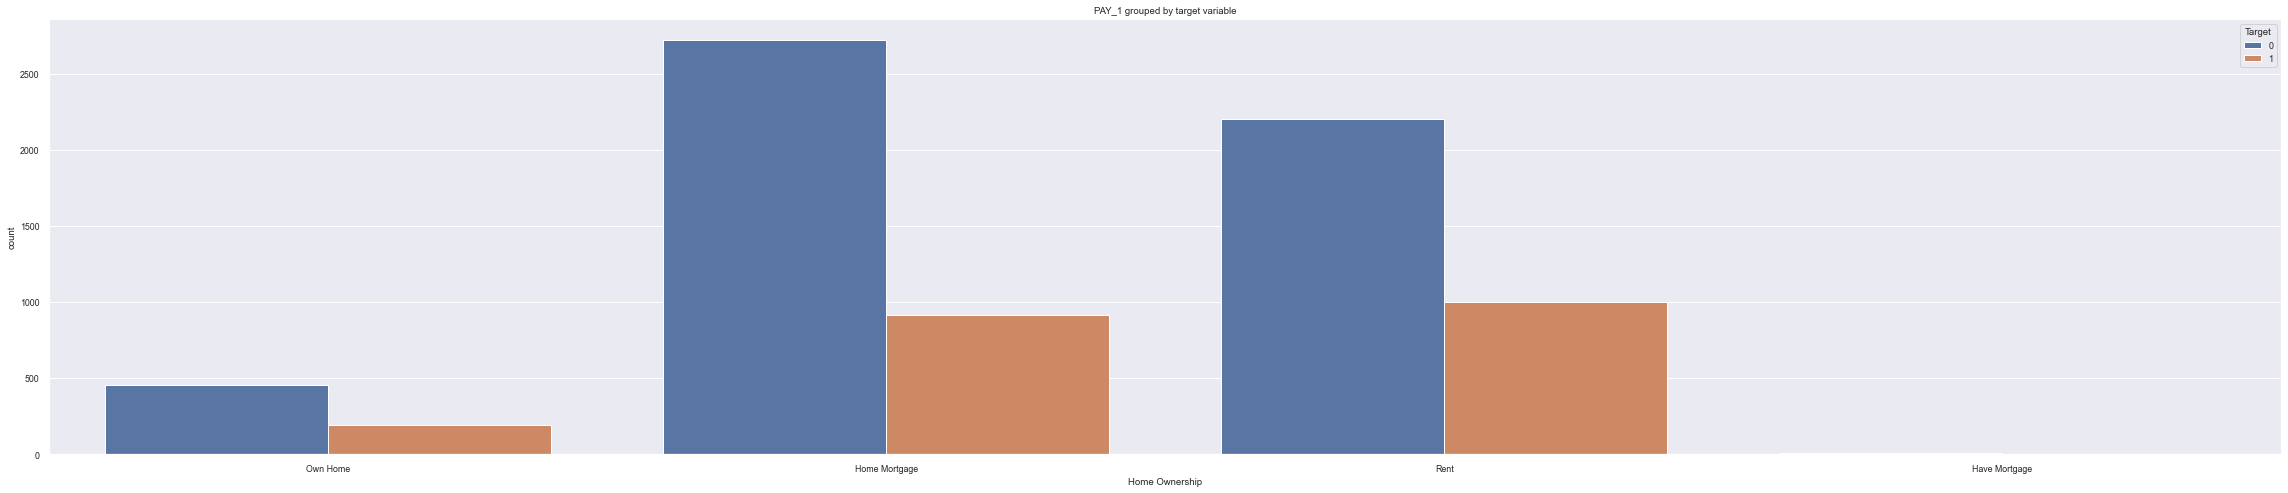

In [100]:
plt.figure(figsize=(40, 8))

sns.countplot(x='Home Ownership', hue=TARGET_NAME, data=df)
plt.title('PAY_1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [ ]:
После долгого рассмотрения выкинула признаки 'Home Ownership' и 'Purpose' так 
как не вижу очевидной связи между ними и погашением кредита.

 Дерево решений

In [101]:
SELECTED_FEATURE_NAMES = ['Annual Income', 'year_cat','problem_credit',
                          'Number of Open Accounts', 'Years of Credit History',
                          'Maximum Open Credit', 'Months since last delinquent', 
                          'Current Loan Amount','Current Credit Balance',
                          'Monthly Debt', 'Credit Score' ]
X = X[SELECTED_FEATURE_NAMES]
X_final = X_final[SELECTED_FEATURE_NAMES]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

Credit Default
0                 0.718286
1                 0.281714
dtype: float64

Credit Default
0                 0.718222
1                 0.281778
dtype: float64

In [102]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))


In [103]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [104]:
model_tree = DecisionTreeClassifier(random_state=21,
                                    class_weight={0:1, 1:2.6},
                                    max_depth=7
                                    )
model_tree.fit(X, y)
y_preds_final = model_tree.predict(X_final)

preds_final['Credit Default'] = y_preds_final
preds_final.to_csv('predic_credit.csv', index=False)

preds_final.head()



evaluate_preds(model_tree, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      3771
           1       0.45      0.70      0.55      1479

    accuracy                           0.67      5250
   macro avg       0.65      0.68      0.65      5250
weighted avg       0.74      0.67      0.69      5250

TEST

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1616
           1       0.45      0.70      0.55       634

    accuracy                           0.68      2250
   macro avg       0.65      0.68      0.65      2250
weighted avg       0.74      0.68      0.69      2250

